In [1]:
import os
from IPython.display import Image
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

df = pd.read_csv('survey_results_public.csv')
df.head(3)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN


In [2]:
df.shape

(64461, 61)

===Data type: Numeric==================
 ['Respondent', 'Age', 'CompTotal', 'ConvertedComp', 'WorkWeekHrs']
===Data type: Object===================
 ['MainBranch', 'Hobbyist', 'Age1stCode', 'CompFreq', 'Country', 'CurrencyDesc', 'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith', 'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors', 'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith', 'MiscTechDesireNextYear', 'MiscTechWorkedWith', 'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps', 'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch', 'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms', 'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites', 'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear', 'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount', 'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength', 'Trans', 'UndergradMajor', 'WebframeDesireNextYear', '

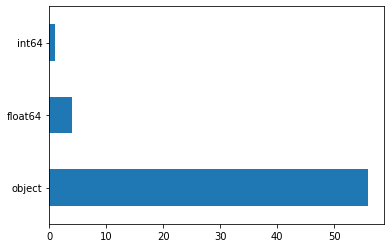

In [3]:
df.dtypes.value_counts().plot(kind='barh')
print('===Data type: Numeric==================\n', df.columns[df.dtypes!=object].tolist())
print('===Data type: Object===================\n', df.columns[df.dtypes==object].tolist())

There are so many categorical data in this dataset(because it's survey) and it contains several different answers like below. Non-categorical columns are 'Respondent', 'Age', 'CompTotal', 'ConvertedComp', 'WorkWeekHrs'.

In [4]:
df[df.columns[df.dtypes==object][0]].value_counts()

I am a developer by profession                                                   47193
I am a student who is learning to code                                            7970
I am not primarily a developer, but I write code sometimes as part of my work     5502
I code primarily as a hobby                                                       2314
I used to be a developer by profession, but no longer am                          1183
Name: MainBranch, dtype: int64

We'll analyze this data based on `CRISP-DM` method. This method has 6 procedures like below.  
 1. Business Understanding  
 2. Data Understanding  
 3. Prepare Data
 4. Data Modeling
 5. Evaluate the Results
 6. Deploy

---

## Questions

#### 1) Do professional developers feel more satisfaction than non-professionals? 
  -> using `MainBranch` and `JobSat`  
  -> Maybe we could make some mentoring service for non-professionals who uses SOF to feel more satisfaction via this.
#### 2) Do professional developers participate more frequently than amatuers? 
  -> using `MainBranch` and `SOPartFreq`  
  -> Maybe we could make some rewards for amatuer developers who uses SOF, for more various participation.
#### 3) Can I predict compensation with other survey columns? 
  -> using `ConvertedComp` as y

---

## 1. Business Understanding

Stack overflow is probably the biggest community for worldwide developers and data scientists. At this community, they annually do survey named `Stack Overflow Annual Developer Survey` for examine all aspects of the developer experience from career satisfaction and job search to education and opinions on open source software. 

---

## 2. Data Wrangling & Analysis /// Answer for Q1 & Q2

We'll handle the `Stack Overflow survey results`, which is from surveyees' demographic informations to their job-related data(salary, job satisfaction, etc).

At first, there are so many missing values in this data. Since I want to see `ConvertedComp` column, we'll ignore rows which have missing values in this column.

In [5]:
df_2 = df.loc[~df['ConvertedComp'].isna()] #Drop the rows with missing salaries
df_2.shape

(34756, 61)

### 2-1. Do professional developers feel more satisfaction than non-professionals?

In [6]:
df_2['MainBranch'].value_counts()

I am a developer by profession                                                   31581
I am not primarily a developer, but I write code sometimes as part of my work     3175
Name: MainBranch, dtype: int64

In [7]:
pd.DataFrame(round(100 * df_2.groupby(['MainBranch', 'JobSat']).count()['Respondent'] / df_2.groupby('MainBranch').count()['Respondent'], 1))

Respondent
MainBranch                                         JobSat                                        
I am a developer by profession                     Neither satisfied nor dissatisfied        11.7
                                                   Slightly dissatisfied                     16.4
                                                   Slightly satisfied                        31.0
                                                   Very dissatisfied                          8.0
                                                   Very satisfied                            32.7
I am not primarily a developer, but I write cod... Neither satisfied nor dissatisfied        11.8
                                                   Slightly dissatisfied                     17.4
                                                   Slightly satisfied                        31.3
                                                   Very dissatisfied                          8.5
                                                   Very satisfied                            30.7

We can see that the sum of percentages of professional developers replied to `Very satisfied` and `Slightly satisfied` is bigger than that of non-professional developers. However, we're surprised at the distribution of replies; they're almost similar!

### 2-2. Do professional developers participate more frequently than amatuers?

In [8]:
pd.DataFrame(round(100 * df_2.groupby(['MainBranch', 'SOPartFreq']).count()['Respondent'] / df_2.groupby('MainBranch').count()['Respondent'], 1))

Respondent
MainBranch                                         SOPartFreq                                                    
I am a developer by profession                     A few times per month or weekly                           14.9
                                                   A few times per week                                       7.7
                                                   Daily or almost daily                                      4.1
                                                   I have never participated in Q&A on Stack Overflow        15.0
                                                   Less than once per month or monthly                       38.0
                                                   Multiple times per day                                     2.1
I am not primarily a developer, but I write cod... A few times per month or weekly                           14.5
                                                   A few times per week                                       6.7
                                                   Daily or almost daily                                      3.5
                                                   I have never participated in Q&A on Stack Overflow        15.8
                                                   Less than once per month or monthly                       34.0
                                                   Multiple times per day                                     1.7

As we can see, our 2nd questions also turned out it really does. The sum of percentages of professional developers replied to `Multiple times per day` and `Daily or almost daily` is bigger than that of non-professionals.

## 3. Simple modeling for compensation /// Answer for Q3

We'll split X and y for doing linear regression for `ConvertedComp`. As we saw above, the most of columns are categorical data. So we'll make dummy variables for these too.

In [9]:
%%time

df_lr = df_2.dropna(subset=['ConvertedComp'], axis=0)
y = df_2['ConvertedComp']

#Drop respondent and expected salary columns
df_lr = df_lr.drop(['CompTotal', 'CompFreq'], axis=1)

# Fill numeric columns with the mean
num_vars = df_lr.select_dtypes(include=['float', 'int']).columns
for col in num_vars:
    df_lr[col].fillna((df_lr[col].mean()), inplace=True)

# Dummy the categorical variables
cat_vars = df_lr.select_dtypes(include=['object']).copy().columns
for var in  cat_vars:
    # for each cat add dummy var, drop original column
    df_lr = pd.concat([df_lr.drop(var, axis=1), pd.get_dummies(df_lr[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)

X = df_lr

CPU times: user 1min 52s, sys: 3min 10s, total: 5min 2s
Wall time: 5min 2s


And than we'll use `train_test_split` for modeling. After that, via `LinearRegression` in scikit learn, we'll do simple modeling for predicting compensation.

In [10]:
%%time

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=77) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

CPU times: user 2d 1h 43min 2s, sys: 8h 4min 16s, total: 2d 9h 47min 19s
Wall time: 1h 14min 45s


LinearRegression(normalize=True)

Let's see our model works well.

In [14]:
#Predict and score the model
y_train_preds = lm_model.predict(X_train)
y_test_preds = lm_model.predict(X_test) 

train_score = r2_score(y_train, y_train_preds)
test_score = r2_score(y_test, y_test_preds)

print('R squared score in train set: {}'.format(train_score))
print('R squared score in test set: {}'.format(test_score))

R squared score in train set: 1.0
R squared score in test set: 0.9976783410642927


We can see that the R2 score in test set is superb! So we could conclude that this survey data could be used to predict respondents' compensation.  
(Of course, if we need to build model more accurately, we should add surveys of other years.)